In [1]:
#Will remove this cell - loading the data set using drive function of google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/BAIM Program/Python

/content/gdrive/My Drive/BAIM Program/Python


In [1]:
#loading the unprocessed data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_data = pd.read_csv('train.csv')
resource_data = pd.read_csv('resources.csv')

In [2]:
#glancing at project_data dataframe
num_of_colmns_proj = len(project_data.columns)
num_of_rows_proj   = len(project_data)
num_of_colmns_reso = len(resource_data.columns)
num_of_rows_reso   = len(resource_data)
print('Number of Columns in Project data   : ',num_of_colmns_proj)
print('Number of rows in Project data      : ',num_of_rows_proj)
print('Number of Columns in Resources data : ',num_of_colmns_reso)
print('Number of rows in Resources data : ',num_of_rows_reso)

Number of Columns in Project data   :  16
Number of rows in Project data      :  182080
Number of Columns in Resources data :  4
Number of rows in Resources data :  1541272


In [3]:
#looking at columns we have in project_data
for i in range(len(project_data.columns)):
    print('Column -',i+1, project_data.columns[i])

Column - 1 id
Column - 2 teacher_id
Column - 3 teacher_prefix
Column - 4 school_state
Column - 5 project_submitted_datetime
Column - 6 project_grade_category
Column - 7 project_subject_categories
Column - 8 project_subject_subcategories
Column - 9 project_title
Column - 10 project_essay_1
Column - 11 project_essay_2
Column - 12 project_essay_3
Column - 13 project_essay_4
Column - 14 project_resource_summary
Column - 15 teacher_number_of_previously_posted_projects
Column - 16 project_is_approved


In [4]:
#having a quick look at the top rows of project data
project_data.head(5)

id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   
2  p233823  a9b876a9252e08a55e3d894150f75ba3            Ms.           UT   
3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.           NC   
4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.           CA   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          Grades PreK-2   
1        2017-04-26 15:57:28             Grades 3-5   
2        2017-01-01 22:57:44             Grades 3-5   
3        2016-08-12 15:42:11             Grades 3-5   
4        2016-08-06 09:09:11             Grades 6-8   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   
3                      Health & Sports   
4                      Health & Sports   

            project_subject_subcategories  \
0                                Literacy   
1            Performing Arts, Team Sports   
2  Applied Sciences, Literature & Writing   
3                       Health & Wellness   
4                       Health & Wellness   

                                       project_title  \
0                           Super Sight Word Centers   
1                             Keep Calm and Dance On   
2                              Lets 3Doodle to Learn   
3  \"Kid Inspired\" Equipment to Increase Activit...   
4   We need clean water for our culinary arts class!   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...   
3  My students are the greatest students but are ...   
4  My students are athletes and students who are ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   
2  We are looking to add some 3Doodler to our cla...             NaN   
3  The student's project which is totally \"kid-i...             NaN   
4  For some reason in our kitchen the water comes...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   
2             NaN  My students need the 3doodler. We are an SEM s...   
3             NaN  My students need balls and other activity equi...   
4             NaN  My students need a water filtration system for...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                            26                    1  
1                                             1                    0  
2                                             5                    1  
3                                            16                    0  
4                                            42                    1

In [5]:
#publishing a few important columns
temp_dataframe = project_data[['teacher_prefix','school_state','project_resource_summary','project_subject_categories','teacher_number_of_previously_posted_projects','project_essay_1','project_is_approved']]
temp_dataframe.head(3)

teacher_prefix school_state  \
0            Ms.           NV   
1           Mrs.           GA   
2            Ms.           UT   

                            project_resource_summary  \
0  My students need 6 Ipod Nano's to create and d...   
1  My students need matching shirts to wear for d...   
2  My students need the 3doodler. We are an SEM s...   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   

   teacher_number_of_previously_posted_projects  \
0                                            26   
1                                             1   
2                                             5   

                                     project_essay_1  project_is_approved  
0  Most of my kindergarten students come from low...                    1  
1  Our elementary school is a culturally rich sch...                    0  
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...                    1

In [6]:
#Renaming a few out of those
temp_dataframe = temp_dataframe.rename(columns = {'project_resource_summary':'project_summary','teacher_number_of_previously_posted_projects':'teacher_previously_posted_projects'})
temp_dataframe.head(3)

teacher_prefix school_state  \
0            Ms.           NV   
1           Mrs.           GA   
2            Ms.           UT   

                                     project_summary  \
0  My students need 6 Ipod Nano's to create and d...   
1  My students need matching shirts to wear for d...   
2  My students need the 3doodler. We are an SEM s...   

            project_subject_categories  teacher_previously_posted_projects  \
0                  Literacy & Language                                  26   
1    Music & The Arts, Health & Sports                                   1   
2  Math & Science, Literacy & Language                                   5   

                                     project_essay_1  project_is_approved  
0  Most of my kindergarten students come from low...                    1  
1  Our elementary school is a culturally rich sch...                    0  
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...                    1

In [7]:
#looking at columns we have in project_data
for i in range(len(resource_data.columns)):
    print('Column -',i+1, resource_data.columns[i])

Column - 1 id
Column - 2 description
Column - 3 quantity
Column - 4 price


In [8]:
#having a quick look at the top rows of project data
resource_data.head(5)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

Quick Observations : Project data has various details about the project, other than the resources required by the teacher. However, resourses required by each project are present in resources the table, that is mapped with project data table using 'id' column. Hence, we may even see within resources table there are multiple rows with same id, as required resources could be more than 1 type. 

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


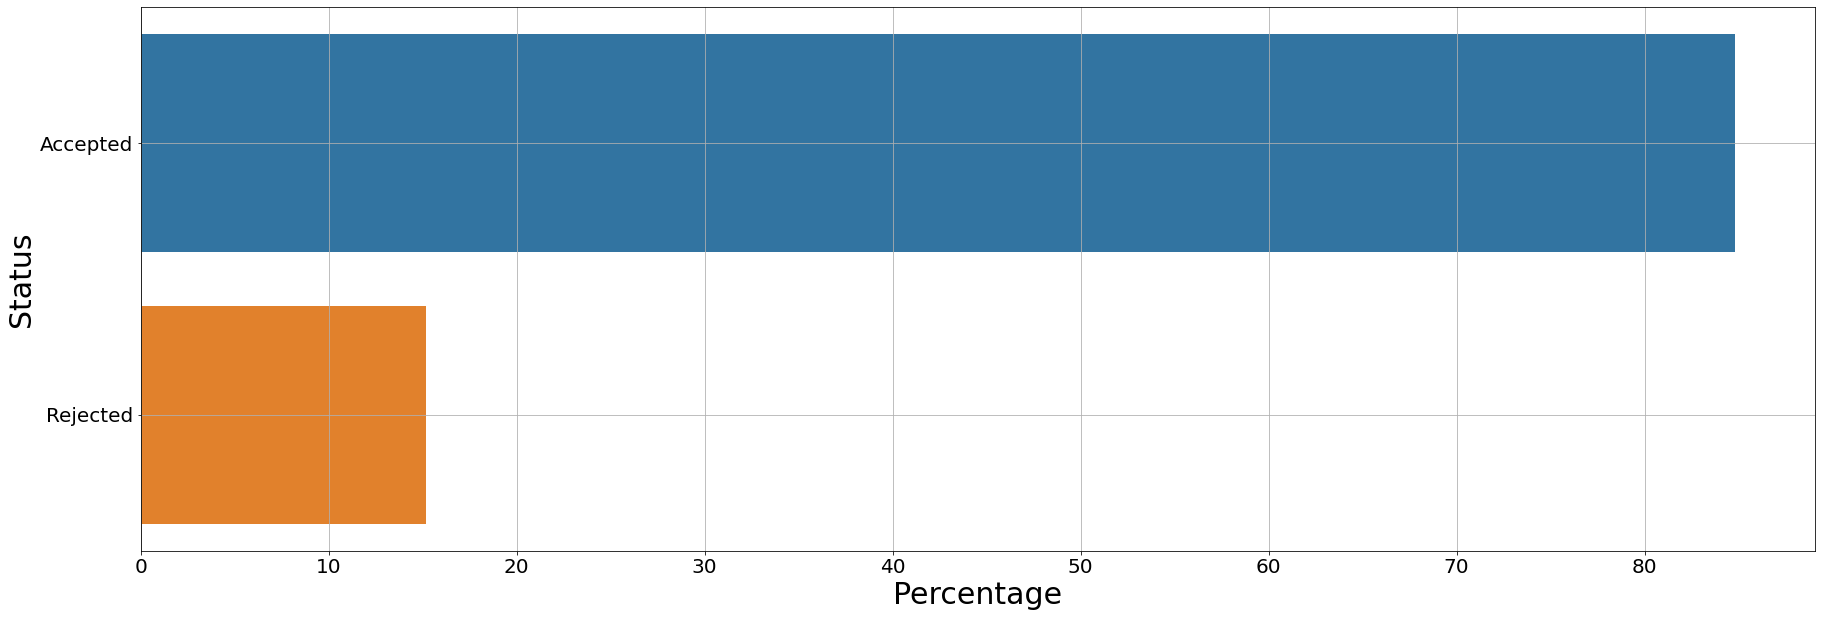

In [9]:
#understanding number of projects got approved and rejected
acc_projects = project_data[project_data['project_is_approved']==1]['project_is_approved'].shape[0]
rej_projects = project_data[project_data['project_is_approved']==0]['project_is_approved'].shape[0]
rej_projects_percent = (round((rej_projects/(acc_projects+rej_projects)),3))*100
acc_projects_percent = 100 - rej_projects_percent
project_percent = [acc_projects_percent,rej_projects_percent]
project_percent_label = ['Accepted','Rejected']
plt.figure(figsize=(30,10))
sns.barplot(project_percent,project_percent_label)
plt.ylabel('Status',fontsize=30)
plt.xlabel('Percentage', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.show()

In [10]:
#univariate analysis of 'Project Resource Summary' and creating a new dataframe for operating with the resource summary column
Resource_summary_data_frame = pd.DataFrame([project_data.id,project_data.project_resource_summary, project_data.project_is_approved]).transpose()
Resource_summary_data_frame.head(5)

id                           project_resource_summary  \
0  p036502  My students need 6 Ipod Nano's to create and d...   
1  p039565  My students need matching shirts to wear for d...   
2  p233823  My students need the 3doodler. We are an SEM s...   
3  p185307  My students need balls and other activity equi...   
4  p013780  My students need a water filtration system for...   

  project_is_approved  
0                   1  
1                   0  
2                   1  
3                   0  
4                   1

In [11]:
#defining the function to calculate the length of the string, number of words, and presence of digit in each summary of resources
import regex as re
def check_len(summary):
  size = len(summary)
  return size

def check_word_count(summary):
  countt=0
  for word in summary.split(' '):
    countt+=1
  return countt

def digit_counter(summary):
  temp = bool(re.search('\d',summary))
  if temp:
    return 1
  else:
    return 0

In [12]:
#introducing new columns to denote the length of project summary and number of words in it
Resource_summary_data_frame['summary_size']     = Resource_summary_data_frame.apply(lambda x: check_len(str(x['project_resource_summary'])),axis=1)
Resource_summary_data_frame['words_in_summary'] = Resource_summary_data_frame.apply(lambda x: check_word_count(str(x['project_resource_summary'])),axis=1)
Resource_summary_data_frame['digit_in_summary'] = Resource_summary_data_frame.apply(lambda x: digit_counter(str(x['project_resource_summary'])),axis=1)
Resource_summary_data_frame.head(5)

id                           project_resource_summary  \
0  p036502  My students need 6 Ipod Nano's to create and d...   
1  p039565  My students need matching shirts to wear for d...   
2  p233823  My students need the 3doodler. We are an SEM s...   
3  p185307  My students need balls and other activity equi...   
4  p013780  My students need a water filtration system for...   

  project_is_approved  summary_size  words_in_summary  digit_in_summary  
0                   1           127                21                 1  
1                   0            81                12                 0  
2                   1           186                33                 1  
3                   0           233                37                 0  
4                   1            71                12                 0

In [13]:
#understanding the variation in the length of summary and number of words in it
summ_max = Resource_summary_data_frame['summary_size'].max()
summ_min = Resource_summary_data_frame['summary_size'].min()
print('='*45)
print('Maximum lenth of summary is  : ',summ_max)
print('Minimum lenth of summary is  : ',summ_min)
print('='*45)
summ_w_max = Resource_summary_data_frame['words_in_summary'].max()
summ_w_min = Resource_summary_data_frame['words_in_summary'].min()
print('Maximum number of words in summary is : ',summ_w_max)
print('Minimum number of words in summary is : ',summ_w_min)
print('='*45)

Maximum lenth of summary is  :  902
Minimum lenth of summary is  :  25
Maximum number of words in summary is :  138
Minimum number of words in summary is :  4


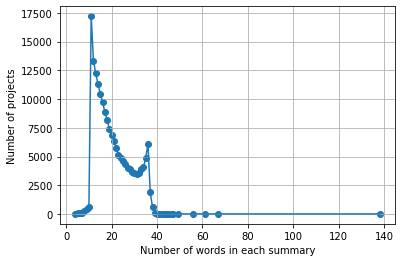

In [14]:
#understanding the variation in number of words in project resource summary
from collections import Counter
summ_word_counter    = Counter()
word_count_summ      = list(Resource_summary_data_frame['words_in_summary'])
summ_word_counter.update(word_count_summ)
summ_word_counter    = dict(summ_word_counter)
summ_word_counter    = dict(sorted(summ_word_counter.items(), key=lambda kv: kv[0]))
plt.plot(list(summ_word_counter.keys()),list(summ_word_counter.values()))
plt.scatter(list(summ_word_counter.keys()),list(summ_word_counter.values()))
plt.xlabel('Number of words in each summary')
plt.ylabel('Number of projects')
plt.grid()
plt.show()

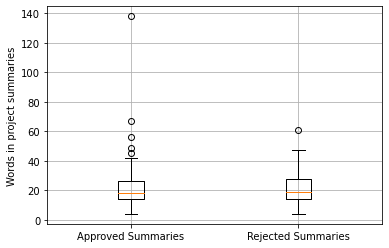

In [15]:
#ploting the box plot for the approved and rejected summaries
app_sum_word_count = Resource_summary_data_frame[Resource_summary_data_frame['project_is_approved']==1]['words_in_summary']
app_sum_word_count = app_sum_word_count.values
rej_sum_word_count = Resource_summary_data_frame[Resource_summary_data_frame['project_is_approved']==0]['words_in_summary']
rej_sum_word_count = rej_sum_word_count.values
plt.boxplot([app_sum_word_count, rej_sum_word_count])
plt.xticks([1,2],('Approved Summaries','Rejected Summaries'))
plt.ylabel('Words in project summaries')
plt.grid()
plt.show()

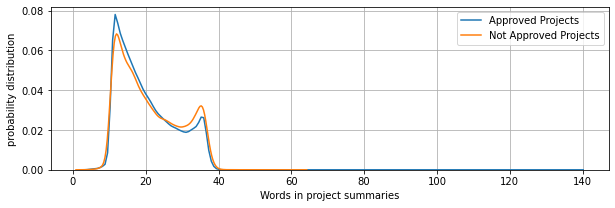

In [16]:
#Plotting the distribution of accepted and rejected summaries on the basis of word count 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
plt.figure(figsize=(10,3))
sns.distplot(app_sum_word_count, hist=False, label="Approved Projects")
sns.distplot(rej_sum_word_count, hist=False, label="Not Approved Projects")
plt.xlabel('Words in project summaries')
plt.ylabel('probability distribution')
plt.grid()
plt.legend()
plt.show()

In [17]:
#understanding the impact of digit present in the summary
app_value_count = Resource_summary_data_frame[Resource_summary_data_frame['project_is_approved']==1]['digit_in_summary'].value_counts()
rej_value_count = Resource_summary_data_frame[Resource_summary_data_frame['project_is_approved']==0]['digit_in_summary'].value_counts()
dig_value_count = Resource_summary_data_frame[Resource_summary_data_frame['digit_in_summary']==1]['project_is_approved'].value_counts()

In [18]:
#percentage calculation of accepted and rejected application within applications with digit in summaries
rej_with_dig = dig_value_count[0]
acc_with_dig = dig_value_count[1]
percent_acc  = round((acc_with_dig/(acc_with_dig+rej_with_dig))*100)
percent_rej  = 100-percent_acc

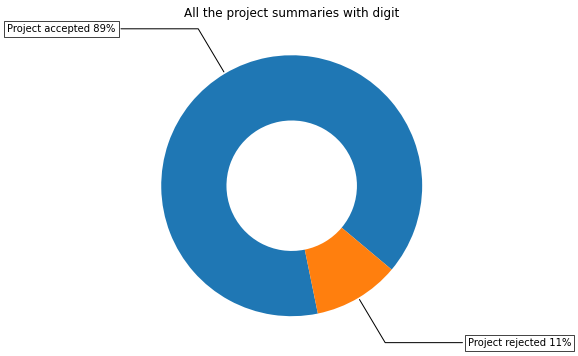

In [19]:
#using function defined in EDA code work sheet of the assignment
import numpy as np
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Project accepted "+str(percent_acc)+"%", "Project rejected "+str(percent_rej)+"%"]
data = [dig_value_count[1], dig_value_count[0]]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
ax.set_title("All the project summaries with digit")
plt.show()

Quick Observation : As the variation in number of words present in the project resources summary is wide in both the cases, that is project accepted and rejected thus nothing decisive can be said on that basis. However, projects with number of words in resources summary higher than 60 is always accpeted. Presence of digit in the summary also seems very important to conclude on probability of acceptance, as around 90% of such projects has been approved.

Cleaning the dataset begins:

In [20]:
#publishing all the columns of project data
project_data.head(3)

id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   
2  p233823  a9b876a9252e08a55e3d894150f75ba3            Ms.           UT   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          Grades PreK-2   
1        2017-04-26 15:57:28             Grades 3-5   
2        2017-01-01 22:57:44             Grades 3-5   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   

            project_subject_subcategories             project_title  \
0                                Literacy  Super Sight Word Centers   
1            Performing Arts, Team Sports    Keep Calm and Dance On   
2  Applied Sciences, Literature & Writing     Lets 3Doodle to Learn   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   
2  We are looking to add some 3Doodler to our cla...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   
2             NaN  My students need the 3doodler. We are an SEM s...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                            26                    1  
1                                             1                    0  
2                                             5                    1

In [21]:
#dropping the columns that we are not going to consider for the preprocessing and final model
project_data = project_data.drop(columns=['teacher_id','project_submitted_datetime'])
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502            Ms.           NV          Grades PreK-2   
1  p039565           Mrs.           GA             Grades 3-5   
2  p233823            Ms.           UT             Grades 3-5   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   

            project_subject_subcategories             project_title  \
0                                Literacy  Super Sight Word Centers   
1            Performing Arts, Team Sports    Keep Calm and Dance On   
2  Applied Sciences, Literature & Writing     Lets 3Doodle to Learn   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   
2  We are looking to add some 3Doodler to our cla...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   
2             NaN  My students need the 3doodler. We are an SEM s...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                            26                    1  
1                                             1                    0  
2                                             5                    1

In [22]:
#Preprocessing the Column : Teacher Prefix, understanding the distibution in category
project_data['teacher_prefix'].value_counts()

Mrs.       95405
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64

In [23]:
#checking if we have any nan values are there
print('Do we any Nan values : ',project_data['teacher_prefix'].isnull().values.any())
print('Number of Nan values : ',project_data['teacher_prefix'].isnull().values.sum())

Do we any Nan values :  True
Number of Nan values :  4


In [24]:
#filling the Nan with 'Mrs' as it being most frequest across the data set
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('Mrs.')
print('Do we any Nan values : ',project_data['teacher_prefix'].isnull().values.any())
print('Number of Nan values : ',project_data['teacher_prefix'].isnull().values.sum())

Do we any Nan values :  False
Number of Nan values :  0


In [25]:
#preprocessing the data
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        95409
ms         65066
mr         17667
teacher     3912
dr            26
Name: teacher_prefix, dtype: int64

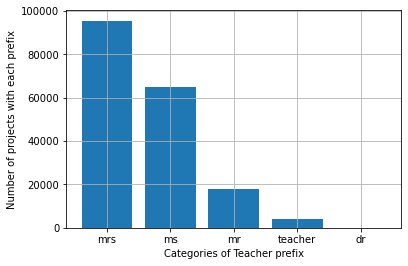

In [26]:
#understanding the distribution of final teacher's prefix
teach_pref_ser = project_data['teacher_prefix'].value_counts()
teach_pref_dic = dict(teach_pref_ser)
teach_pref_val = list(teach_pref_dic.values())
teach_pref_key = list(teach_pref_dic.keys())
plt.bar(teach_pref_key,teach_pref_val)
plt.xlabel('Categories of Teacher prefix')
plt.ylabel('Number of projects with each prefix')
plt.grid()
plt.show()

In [27]:
#Preprocessing the Column : School State, understanding the distibution in category
project_data['school_state'].value_counts()

CA    25695
TX    12304
NY    12157
FL    10359
NC     8463
IL     7332
GA     6636
SC     6463
MI     5324
PA     5093
IN     4314
MO     4247
OH     4139
MA     4054
LA     3946
WA     3903
OK     3829
NJ     3671
AZ     3614
VA     3446
WI     2983
AL     2955
TN     2836
UT     2814
CT     2766
MD     2480
NV     2297
MS     2222
KY     2172
OR     2119
MN     2055
CO     1887
AR     1757
ID     1113
IA     1079
KS     1060
NM      916
DC      902
HI      869
WV      839
ME      827
DE      589
NH      587
AK      557
SD      494
NE      493
RI      475
MT      384
ND      248
WY      177
VT      139
Name: school_state, dtype: int64

In [28]:
#Preprocessing the Column : School State, understanding the distibution in category
school_state_ser = project_data['school_state'].value_counts()
school_state_dic = dict(school_state_ser)
school_state_val = list(school_state_dic.values())
school_state_key = list(school_state_dic.keys())

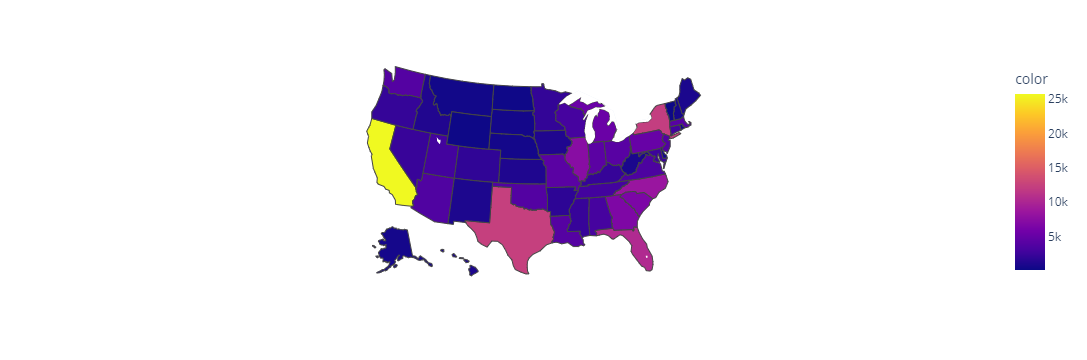

In [29]:
import plotly.express as px
fig = px.choropleth(locations=school_state_key, locationmode="USA-states", color=school_state_val, scope="usa")
fig.show()

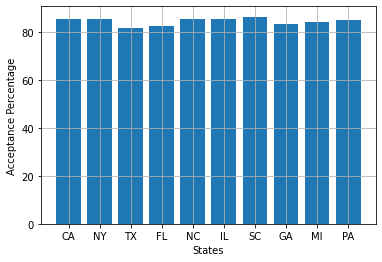

In [30]:
#understanding variation in projection acceptance within state category
states_approved      = project_data[project_data['project_is_approved']==1]
states_approved_ser  = states_approved['school_state'].value_counts()
states_approved_dic  = dict(states_approved_ser)
states_approved_val  = list(states_approved_dic.values())
states_approved_key  = list(states_approved_dic.keys())
state_total_appl_di  = dict(project_data['school_state'].value_counts())
top_app_perc_states  = []
applied              = []
for i in states_approved_key[0:10]:
    total_applied = state_total_appl_di[i]
    applied.append(total_applied) 
for j in range(len(states_approved_key[0:10])):
    temp = round((states_approved_val[j]/applied[j])*100,2)
    top_app_perc_states.append(temp)
plt.bar(states_approved_key[0:10],top_app_perc_states)
plt.xlabel('States')
plt.ylabel('Acceptance Percentage')
plt.grid()
plt.show()

In [31]:
#preprocessing the data
project_data['school_state'] = project_data['school_state'].str.lower()

In [32]:
#Preprocessing the Column : Project Grade Category, understanding the distibution in category
project_data['project_grade_category'].value_counts()

Grades PreK-2    73890
Grades 3-5       61682
Grades 6-8       28197
Grades 9-12      18311
Name: project_grade_category, dtype: int64

In [33]:
#preprocessing the data project 
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    73890
grades_3_5       61682
grades_6_8       28197
grades_9_12      18311
Name: project_grade_category, dtype: int64

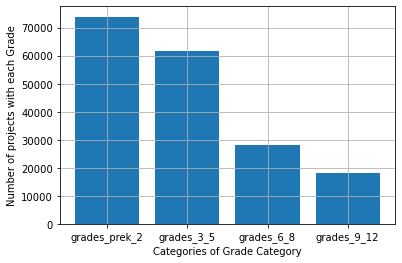

In [34]:
#understanding the distribution of final project_grade_category
project_grade_category_ser = project_data['project_grade_category'].value_counts()
project_grade_category_dic = dict(project_grade_category_ser)
project_grade_category_val = list(project_grade_category_dic.values())
project_grade_category_key = list(project_grade_category_dic.keys())
plt.bar(project_grade_category_key,project_grade_category_val)
plt.xlabel('Categories of Grade Category')
plt.ylabel('Number of projects with each Grade')
plt.grid()
plt.show()

In [35]:
#Preprocessing the Column : Project Subject Categories, understanding the distibution in category
project_data['project_subject_categories'].value_counts()

Literacy & Language                           39257
Math & Science                                28555
Literacy & Language, Math & Science           24499
Health & Sports                               16951
Music & The Arts                               8527
Special Needs                                  7065
Literacy & Language, Special Needs             6685
Applied Learning                               6310
Math & Science, Literacy & Language            3843
Applied Learning, Literacy & Language          3725
History & Civics                               3065
Math & Science, Special Needs                  3010
Literacy & Language, Music & The Arts          2878
Math & Science, Music & The Arts               2761
Applied Learning, Special Needs                2481
Health & Sports, Special Needs                 2368
History & Civics, Literacy & Language          2288
Warmth, Care & Hunger                          2191
Math & Science, Applied Learning               2071
Applied Lear

In [36]:
#preprocessing the data to remove spaces, coma, the and other stop words
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

literacy_language                       39257
math_science                            28555
literacy_language_math_science          24499
health_sports                           16951
music_arts                               8527
specialneeds                             7065
literacy_language_specialneeds           6685
appliedlearning                          6310
math_science_literacy_language           3843
appliedlearning_literacy_language        3725
history_civics                           3065
math_science_specialneeds                3010
literacy_language_music_arts             2878
math_science_music_arts                  2761
appliedlearning_specialneeds             2481
health_sports_specialneeds               2368
history_civics_literacy_language         2288
warmth_care_hunger                       2191
math_science_appliedlearning             2071
appliedlearning_math_science             1711
literacy_language_history_civics         1315
health_sports_literacy_language   

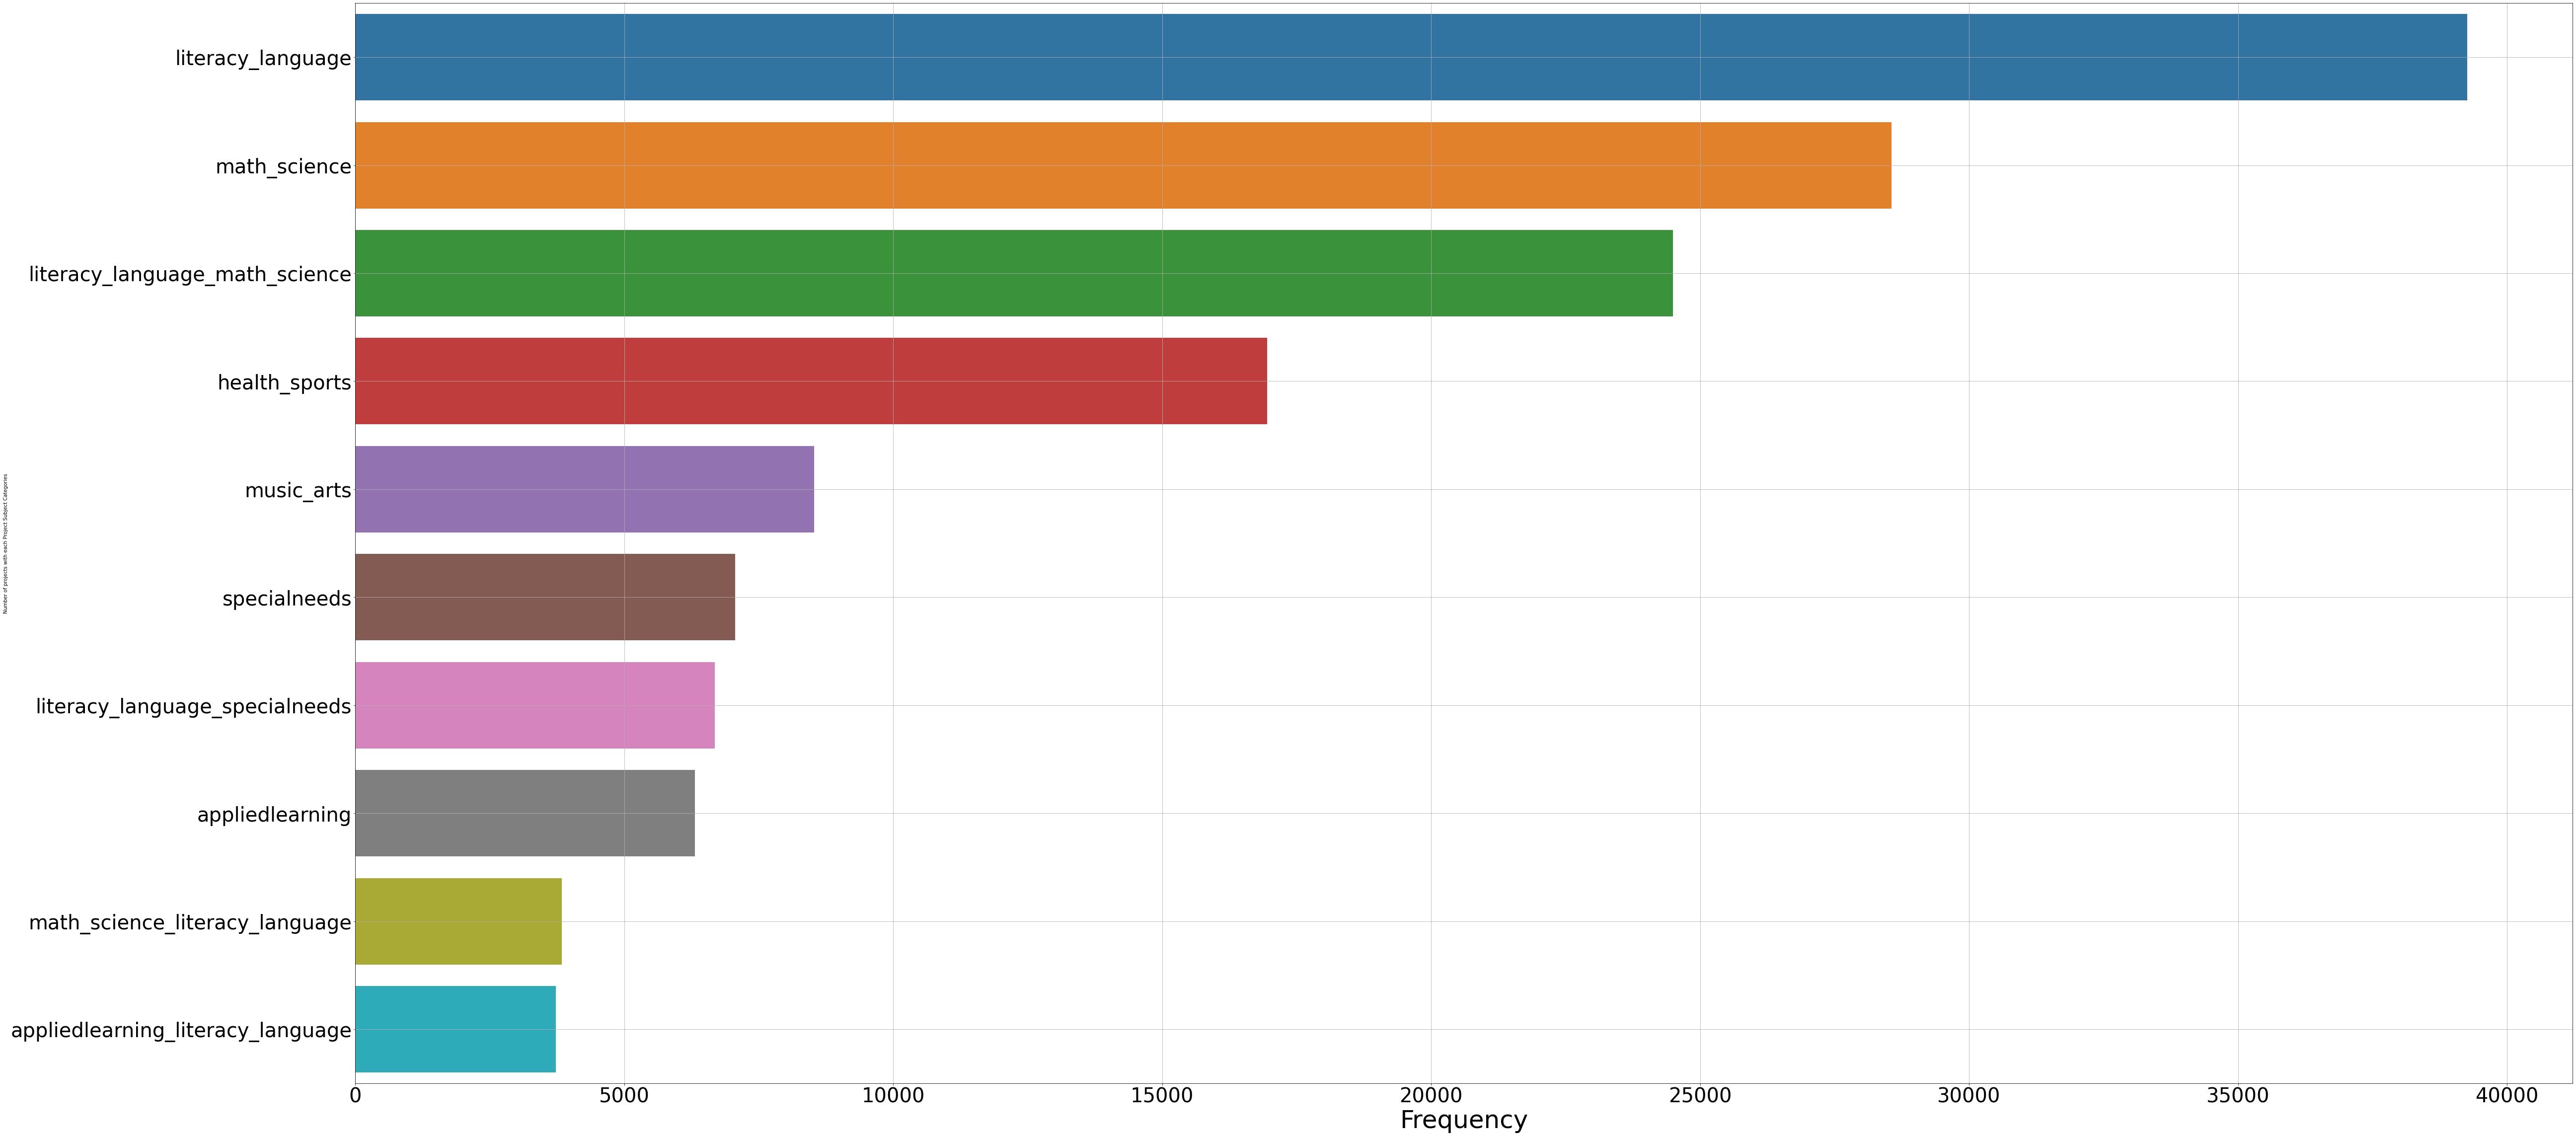

In [37]:
#Preprocessing the Column : Project Subject Subcategories, Understanding the distribution 
import seaborn as sns
project_subject_categories_ser = project_data['project_subject_categories'].value_counts()
project_subject_categories_dic = dict(project_subject_categories_ser)
project_subject_categories_val = list(project_subject_categories_dic.values())
project_subject_categories_key = list(project_subject_categories_dic.keys())
plt.figure(figsize=(80,40))
sns.barplot(project_subject_categories_val[0:10],project_subject_categories_key[0:10])
plt.xlabel('Categories of Project Subject Categories')
plt.ylabel('Number of projects with each Project Subject Categories')
plt.xlabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.grid()
plt.show()

In [38]:
#understanding the distibution in category
project_data['project_subject_subcategories'].value_counts().head(5)

Literacy                             15775
Literacy, Mathematics                13863
Literature & Writing, Mathematics     9976
Literacy, Literature & Writing        9282
Mathematics                           9041
Name: project_subject_subcategories, dtype: int64

In [39]:
#preprocessing the data 
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts().head(10)

literacy                          15775
literacy_mathematics              13863
literature_writing_mathematics     9976
literacy_literature_writing        9282
mathematics                        9041
literature_writing                 7474
specialneeds                       7065
health_wellness                    5924
appliedsciences_mathematics        5651
literacy_specialneeds              4091
Name: project_subject_subcategories, dtype: int64

In [40]:
#Preprocessing the Column : Project Title, creating function to do so
import re
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [41]:
#creating a list of stop words
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [42]:
#using above functions and list of stop words to preprocess the textual data
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [43]:
#preprocessing the project title using above defined functions
cleaned_project_title = preprocess_text(project_data['project_title'].values)

100%|███████████████████████████████████████████████████████████████████████| 182080/182080 [00:05<00:00, 32109.19it/s]


In [44]:
#creating a new column with preprocessed project titles
project_data['cleaned_project_title'] = np.array(cleaned_project_title)

In [45]:
#understanding the change after preprocessing the project title
print('='*110)
print("printing some random project title : ")
print(project_data['project_title'].values[9])
print(project_data['project_title'].values[63])
print(project_data['project_title'].values[300])
print(project_data['project_title'].values[6039])
print(project_data['project_title'].values[109247])
print('='*110)
print("printing same resources summaries after preprocessing : ")
print(project_data['cleaned_project_title'].values[9])
print(project_data['cleaned_project_title'].values[63])
print(project_data['cleaned_project_title'].values[300])
print(project_data['cleaned_project_title'].values[6039])
print(project_data['cleaned_project_title'].values[109247])
print('='*110)

printing some random project title : 
Snuggle Up With A Good Book
Cut It Out
Reading is still FUNDAMENTAL!!!
Creating 21st Century Learners
First Grade Library
printing same resources summaries after preprocessing : 
snuggle good book
cut
reading still fundamental
creating 21st century learners
first grade library


In [46]:
#purging the raw column of project title
project_data = project_data.drop(columns=['project_title'])
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   
2  We are looking to add some 3Doodler to our cla...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   
2             NaN  My students need the 3doodler. We are an SEM s...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                             1                    0   
2                                             5                    1   

      cleaned_project_title  
0  super sight word centers  
1           keep calm dance  
2        lets 3doodle learn

In [47]:
#checking if we have any nan values are there
print('Do we any blank values : ',project_data[project_data['cleaned_project_title']==''].shape[0])

Do we any blank values :  68


In [48]:
#replacing all such blank values in the table
project_data.loc[(project_data.cleaned_project_title == ''),'cleaned_project_title']='Empty'
print('Do we any blank values : ',project_data[project_data['cleaned_project_title']==''].shape[0])

Do we any blank values :  0


In [49]:
#Preprocessing the Column : Project Essay, merging the 4 columns of essay in the project data into 1 single new column using code snipet from notebook provided in assignment
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) +\
                        project_data["project_essay_3"].map(str) +\
                        project_data["project_essay_4"].map(str)

In [50]:
#preprocessing the project essays using above defined functions
clean_essay = preprocess_text(project_data['essay'].values)

100%|████████████████████████████████████████████████████████████████████████| 182080/182080 [02:29<00:00, 1214.76it/s]


In [51]:
#creating a new column with preprocessed project titles
project_data['cleaned_essay'] = np.array(clean_essay)

In [52]:
#understanding the change after preprocessing the project title
print('='*110)
print("printing some random project Essays : ")
print(project_data['essay'].values[9])
print(project_data['essay'].values[63])
print('='*110)
print("printing same project Essays after preprocessing : ")
print(project_data['cleaned_essay'].values[9])
print(project_data['cleaned_essay'].values[63])
print('='*110)

printing some random project Essays : 
I teach first grade in a small farming town in Illinois. We have such a diverse students population. On one side of town, we have students who come from half-million-dollar homes and on the other side of town students who come from public-housing situations. 30% of our student population receives free and reduced price lunch and school fees. My goal for all my students is to give each and every one of them the SAME opportunity to learn with every advantage possible.\r\n\r\nIf I can accomplish one thing in the short time I have my students, it would be that know that I truly love and value them as individuals.\r\n\r\nThere is nothing better than snuggling up with a good book and getting lost in it.  I strive to create a love reading by motivating students to want to read.  For that past several years I have been adding furniture such as a couch, pillows, and a tent for students to \"snuggle up\" and read a book.  I would love to add these 2 reclini

In [53]:
#purging the raw columns of project title
project_data = project_data.drop(columns=['project_essay_1','project_essay_2','project_essay_3','project_essay_4','essay'])
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

                            project_resource_summary  \
0  My students need 6 Ipod Nano's to create and d...   
1  My students need matching shirts to wear for d...   
2  My students need the 3doodler. We are an SEM s...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                             1                    0   
2                                             5                    1   

      cleaned_project_title                                      cleaned_essay  
0  super sight word centers  kindergarten students come low income househol...  
1           keep calm dance  elementary school culturally rich school diver...  
2        lets 3doodle learn  hello name mrs brotherton teach 5th grade asce...

In [54]:
#checking if we have any nan values are there
print('Do we any Nan values : ',project_data['teacher_prefix'].isnull().values.any())
print('Number of Nan values : ',project_data['teacher_prefix'].isnull().values.sum())

Do we any Nan values :  False
Number of Nan values :  0


In [55]:
#preprocessing the project essays using above defined functions
cleaned_resource_summary = preprocess_text(project_data['project_resource_summary'].values)

100%|███████████████████████████████████████████████████████████████████████| 182080/182080 [00:13<00:00, 13364.49it/s]


In [56]:
#creating a new column with preprocessed project resource summary
project_data['cleaned_resource_summary'] = np.array(cleaned_resource_summary)

In [57]:
#purging the raw columns of project title
project_data = project_data.drop(columns=['project_resource_summary'])
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                             1                    0   
2                                             5                    1   

      cleaned_project_title  \
0  super sight word centers   
1           keep calm dance   
2        lets 3doodle learn   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   

                            cleaned_resource_summary  
0  students need 6 ipod nano create differentiate...  
1  students need matching shirts wear dance perfo...  
2  students need 3doodler sem school means studen...

In [58]:
#defining the function to understand if digit is present in the textual data
import regex as re
def digit_counter(summary):
  temp = bool(re.search('\d',summary))
  if temp:
    return 1
  else:
    return 0

In [59]:
#introducing new column 'digit_in_summary' to denote the if digit is present in the project resource summary
project_data['digit_in_summary'] = project_data.apply(lambda x: digit_counter(str(x['cleaned_resource_summary'])),axis=1)
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                             1                    0   
2                                             5                    1   

      cleaned_project_title  \
0  super sight word centers   
1           keep calm dance   
2        lets 3doodle learn   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   

                            cleaned_resource_summary  digit_in_summary  
0  students need 6 ipod nano create differentiate...                 1  
1  students need matching shirts wear dance perfo...                 0  
2  students need 3doodler sem school means studen...                 1

In [60]:
#renaming the large column name 'teacher_number_of_previously_posted_projects' to shorter version 'teacher_prev_posts'
project_data.rename(columns = {'teacher_number_of_previously_posted_projects':'teacher_prev_posts'}, inplace = True)

In [61]:
#publishing the table after changes
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

   teacher_prev_posts  project_is_approved     cleaned_project_title  \
0                  26                    1  super sight word centers   
1                   1                    0           keep calm dance   
2                   5                    1        lets 3doodle learn   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   

                            cleaned_resource_summary  digit_in_summary  
0  students need 6 ipod nano create differentiate...                 1  
1  students need matching shirts wear dance perfo...                 0  
2  students need 3doodler sem school means studen...                 1

In [62]:
#Preprocessing the Column : Price, publishinh top 3 rows of resource data table that contains the project's price
resource_data.head(3)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   

    price  
0  149.00  
1   14.95  
2    8.45

In [63]:
#using code snipet from the preprocessing worksheet shared in assignment
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21
2  p000003  298.97         4

In [64]:
#purging the irrelevant columns of price data table
price_data = price_data.drop(columns=['quantity'])
price_data.head(3)

id   price
0  p000001  459.56
1  p000002  515.89
2  p000003  298.97

In [65]:
#Merging the two tables project data and price data making project id common column 
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

   teacher_prev_posts  project_is_approved     cleaned_project_title  \
0                  26                    1  super sight word centers   
1                   1                    0           keep calm dance   
2                   5                    1        lets 3doodle learn   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   

                            cleaned_resource_summary  digit_in_summary   price  
0  students need 6 ipod nano create differentiate...                 1  299.98  
1  students need matching shirts wear dance perfo...                 0   20.00  
2  students need 3doodler sem school means studen...                 1  469.99

In [66]:
#publishing the final data set project data
project_data.head(6)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   
3  p185307             mr           nc             grades_3_5   
4  p013780             mr           ca             grades_6_8   
5  p063374            mrs           de          grades_prek_2   

          project_subject_categories          project_subject_subcategories  \
0                  literacy_language                               literacy   
1           music_arts_health_sports              performingarts_teamsports   
2     math_science_literacy_language     appliedsciences_literature_writing   
3                      health_sports                        health_wellness   
4                      health_sports                        health_wellness   
5  appliedlearning_literacy_language  charactereducation_literature_writing   

   teacher_prev_posts  project_is_approved  \
0                  26                    1   
1                   1                    0   
2                   5                    1   
3                  16                    0   
4                  42                    1   
5                   0                    1   

                               cleaned_project_title  \
0                           super sight word centers   
1                                    keep calm dance   
2                                 lets 3doodle learn   
3  kid inspired equipment increase activities gai...   
4               need clean water culinary arts class   
5                         need reach virtual mentors   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   
3  students greatest students socially economical...   
4  students athletes students interested health p...   
5  kids tell day want make one happy teacher resp...   

                            cleaned_resource_summary  digit_in_summary   price  
0  students need 6 ipod nano create differentiate...                 1  299.98  
1  students need matching shirts wear dance perfo...                 0   20.00  
2  students need 3doodler sem school means studen...                 1  469.99  
3  students need balls activity equipment meet ne...                 0  684.47  
4  students need water filtration system culinary...                 0  355.50  
5  students need tablets order communicate virtua...                 0  207.82

In [67]:
#understanding the importance of quantifying the requirement
project_data_digit_app     = project_data[project_data['project_is_approved']==1]['digit_in_summary']
acc_ratio_with_digit       = project_data_digit_app.sum()/len(project_data_digit_app)
project_data_digit_rej     = project_data[project_data['project_is_approved']==0]['digit_in_summary']
rej_ratio_with_digit       = project_data_digit_rej.sum()/len(project_data_digit_rej)
acc_percentage_with_digit  = round(acc_ratio_with_digit*100,2)
rej_percentage_with_digit  = round(rej_ratio_with_digit*100,2)
print('Accepted Percentage with digit    : ',acc_percentage_with_digit,'%')
print('Rejected Percentage without digit : ',rej_percentage_with_digit,'%')

Accepted Percentage with digit    :  15.21 %
Rejected Percentage without digit :  10.12 %


In [68]:
#generating the csv file from the data frame
project_data.to_csv('final_preprocessed_data_2.csv', index=False)

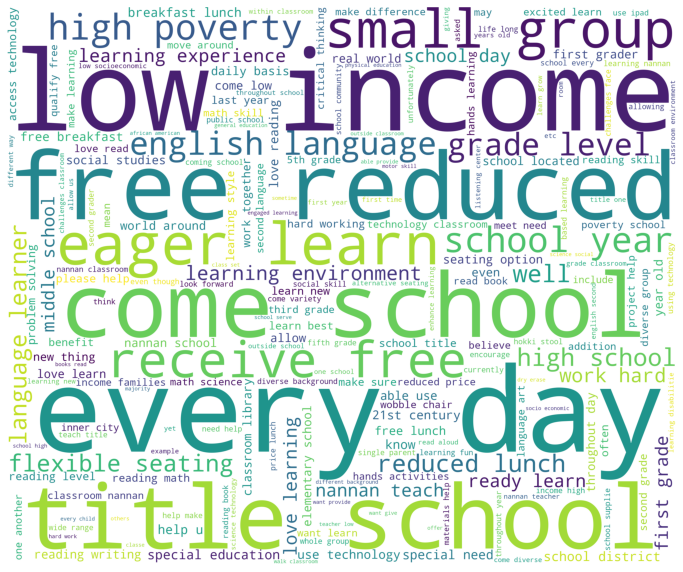

In [69]:
#generating clound of words from cleaned essay with accepted application
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
words = ' '.join(project_data.loc[(project_data.project_is_approved == 1)]['cleaned_essay'])
STOPWORDS.add("student")
STOPWORDS.add("students")
STOPWORDS.add("many")
STOPWORDS.add("nan")
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [70]:
#loading the unprocessed data
import pandas as pd
project_data = pd.read_csv('final_preprocessed_data_2.csv')

In [71]:
project_data.head(3)

id teacher_prefix school_state project_grade_category  \
0  p036502             ms           nv          grades_prek_2   
1  p039565            mrs           ga             grades_3_5   
2  p233823             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

   teacher_prev_posts  project_is_approved     cleaned_project_title  \
0                  26                    1  super sight word centers   
1                   1                    0           keep calm dance   
2                   5                    1        lets 3doodle learn   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   

                            cleaned_resource_summary  digit_in_summary   price  
0  students need 6 ipod nano create differentiate...                 1  299.98  
1  students need matching shirts wear dance perfo...                 0   20.00  
2  students need 3doodler sem school means studen...                 1  469.99

In [72]:
#partioning columns as per the nature of metadata
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved','id'], axis=1)

In [73]:
#viewing data that finally need to be processed
X.head(3)

teacher_prefix school_state project_grade_category  \
0             ms           nv          grades_prek_2   
1            mrs           ga             grades_3_5   
2             ms           ut             grades_3_5   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   

   teacher_prev_posts     cleaned_project_title  \
0                  26  super sight word centers   
1                   1           keep calm dance   
2                   5        lets 3doodle learn   

                                       cleaned_essay  \
0  kindergarten students come low income househol...   
1  elementary school culturally rich school diver...   
2  hello name mrs brotherton teach 5th grade asce...   

                            cleaned_resource_summary  digit_in_summary   price  
0  students need 6 ipod nano create differentiate...                 1  299.98  
1  students need matching shirts wear dance perfo...                 0   20.00  
2  students need 3doodler sem school means studen...                 1  469.99

In [74]:
#spliting the entire data into train and test, then further train data into train and cross validate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [75]:
#creating a big list of all the features through train data
big_list_features = []

In [76]:
#fit vectorizing the column of train data using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 5


In [77]:
#using fitted count vectorizer to convert text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

In [78]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_teacher_ohe.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_teacher_ohe.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_teacher_ohe.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 5) Y train shape : (97594,)
C.V.  vector shape :  (48070, 5) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 5) Y test  shape : (36416,)


In [79]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 51


In [80]:
#using fitted count vectorizer to convert text to vector
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

In [81]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_school_state_ohe.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_school_state_ohe.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_school_state_ohe.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 51) Y train shape : (97594,)
C.V.  vector shape :  (48070, 51) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 51) Y test  shape : (36416,)


In [82]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 4


In [83]:
#using fitted count vectorizer to convert text to vector
X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

In [84]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_project_grade_category_ohe.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_project_grade_category_ohe.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_project_grade_category_ohe.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 4) Y train shape : (97594,)
C.V.  vector shape :  (48070, 4) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 4) Y test  shape : (36416,)


In [85]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_categories'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 50


In [86]:
#using fitted count vectorizer to convert text to vector
X_train_project_subject_categories_ohe = vectorizer.transform(X_train['project_subject_categories'].values)
X_cv_project_subject_categories_ohe = vectorizer.transform(X_cv['project_subject_categories'].values)
X_test_project_subject_categories_ohe = vectorizer.transform(X_test['project_subject_categories'].values)

In [87]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_project_subject_categories_ohe.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_project_subject_categories_ohe.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_project_subject_categories_ohe.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 50) Y train shape : (97594,)
C.V.  vector shape :  (48070, 50) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 50) Y test  shape : (36416,)


In [88]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_subject_subcategories'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 397


In [89]:
#using fitted count vectorizer to convert text to vector
X_train_project_subject_subcategories_ohe = vectorizer.transform(X_train['project_subject_subcategories'].values)
X_cv_project_subject_subcategories_ohe = vectorizer.transform(X_cv['project_subject_subcategories'].values)
X_test_project_subject_subcategories_ohe = vectorizer.transform(X_test['project_subject_subcategories'].values)

In [90]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_project_subject_subcategories_ohe.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_project_subject_subcategories_ohe.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_project_subject_subcategories_ohe.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 397) Y train shape : (97594,)
C.V.  vector shape :  (48070, 397) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 397) Y test  shape : (36416,)


In [91]:
#fit vectorizing the column of train data using CountVectorizer
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_prev_posts'].values.reshape(-1,1))
big_list_features.extend(['teacher_prev_posts'])

In [92]:
#using fitted Normalizer
X_train_teacher_prev_posts_norm = (normalizer.transform(X_train['teacher_prev_posts'].values.reshape(-1,1)))
X_cv_teacher_prev_posts_norm = (normalizer.transform(X_cv['teacher_prev_posts'].values.reshape(-1,1)))
X_test_teacher_prev_posts_norm = (normalizer.transform(X_test['teacher_prev_posts'].values.reshape(-1,1)))

In [93]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_teacher_prev_posts_norm.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_teacher_prev_posts_norm.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_teacher_prev_posts_norm.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 1) Y train shape : (97594,)
C.V.  vector shape :  (48070, 1) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 1) Y test  shape : (36416,)


In [94]:
#fit vectorizing the column of train data using CountVectorizer
normalizer = Normalizer()
normalizer.fit(X_train['digit_in_summary'].values.reshape(-1,1))
big_list_features.extend(['digit_in_summary'])

In [95]:
#using fitted Normalizer
X_train_digit_in_summary_norm = normalizer.transform(X_train['digit_in_summary'].values.reshape(-1,1))
X_cv_digit_in_summary_norm = normalizer.transform(X_cv['digit_in_summary'].values.reshape(-1,1))
X_test_digit_in_summary_norm = normalizer.transform(X_test['digit_in_summary'].values.reshape(-1,1))

In [96]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_digit_in_summary_norm.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_digit_in_summary_norm.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_digit_in_summary_norm.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 1) Y train shape : (97594,)
C.V.  vector shape :  (48070, 1) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 1) Y test  shape : (36416,)


In [97]:
#fit vectorizing the column of train data using CountVectorizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
big_list_features.extend(['price'])

In [98]:
#using fitted Normalizer
X_train_price_norm = (normalizer.transform(X_train['price'].values.reshape(-1,1))).reshape(-1,1)
X_cv_price_norm = (normalizer.transform(X_cv['price'].values.reshape(-1,1))).reshape(-1,1)
X_test_price_norm = (normalizer.transform(X_test['price'].values.reshape(-1,1))).reshape(-1,1)

In [99]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_price_norm.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_price_norm.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_price_norm.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 1) Y train shape : (97594,)
C.V.  vector shape :  (48070, 1) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 1) Y test  shape : (36416,)


In [100]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['cleaned_project_title'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 5000


In [101]:
#using fitted count vectorizer to convert text to vector
X_train_cleaned_project_title_bow = vectorizer.transform(X_train['cleaned_project_title'].values)
X_cv_cleaned_project_title_bow = vectorizer.transform(X_cv['cleaned_project_title'].values)
X_test_cleaned_project_title_bow = vectorizer.transform(X_test['cleaned_project_title'].values)

In [102]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_cleaned_project_title_bow.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_cleaned_project_title_bow.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_cleaned_project_title_bow.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 5000) Y train shape : (97594,)
C.V.  vector shape :  (48070, 5000) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 5000) Y test  shape : (36416,)


In [103]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['cleaned_essay'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 5000


In [104]:
#using fitted count vectorizer to convert text to vector
X_train_cleaned_essay_bow = vectorizer.transform(X_train['cleaned_essay'].values)
X_cv_cleaned_essay_bow = vectorizer.transform(X_cv['cleaned_essay'].values)
X_test_cleaned_essay_bow = vectorizer.transform(X_test['cleaned_essay'].values)

In [105]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_cleaned_essay_bow.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_cleaned_essay_bow.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_cleaned_essay_bow.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 5000) Y train shape : (97594,)
C.V.  vector shape :  (48070, 5000) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 5000) Y test  shape : (36416,)


In [106]:
#fit vectorizing the column of train data using CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['cleaned_resource_summary'].values)
print('Features on one hot encoding for the column :',len(vectorizer.get_feature_names()))
big_list_features.extend(vectorizer.get_feature_names())

Features on one hot encoding for the column : 5000


In [107]:
#using fitted count vectorizer to convert text to vector
X_train_cleaned_resource_summary_bow = vectorizer.transform(X_train['cleaned_resource_summary'].values)
X_cv_cleaned_resource_summary_bow = vectorizer.transform(X_cv['cleaned_resource_summary'].values)
X_test_cleaned_resource_summary_bow = vectorizer.transform(X_test['cleaned_resource_summary'].values)

In [108]:
#printing the shape of vectors obtained post transformation and validating the number of rows using 'y'
print('Train vector shape : ',X_train_cleaned_resource_summary_bow.shape,'Y train shape :',y_train.shape)
print('C.V.  vector shape : ',X_cv_cleaned_resource_summary_bow.shape,'Y C.V.  shape :', y_cv.shape)
print('Test  vector shape : ',X_test_cleaned_resource_summary_bow.shape,'Y test  shape :', y_test.shape)

Train vector shape :  (97594, 5000) Y train shape : (97594,)
C.V.  vector shape :  (48070, 5000) Y C.V.  shape : (48070,)
Test  vector shape :  (36416, 5000) Y test  shape : (36416,)


In [109]:
#concatinating features using hstack from scipy
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_teacher_ohe, X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_project_subject_categories_ohe, X_train_project_subject_subcategories_ohe, X_train_teacher_prev_posts_norm, X_train_digit_in_summary_norm, X_train_price_norm, X_train_cleaned_project_title_bow, X_train_cleaned_essay_bow, X_train_cleaned_resource_summary_bow)).tocsr()
X_cr_bow = hstack((X_cv_teacher_ohe, X_cv_school_state_ohe, X_cv_project_grade_category_ohe, X_cv_project_subject_categories_ohe, X_cv_project_subject_subcategories_ohe, X_cv_teacher_prev_posts_norm, X_cv_digit_in_summary_norm, X_cv_price_norm, X_cv_cleaned_project_title_bow, X_cv_cleaned_essay_bow, X_cv_cleaned_resource_summary_bow)).tocsr()
X_te_bow = hstack((X_test_teacher_ohe, X_test_school_state_ohe, X_test_project_grade_category_ohe, X_test_project_subject_categories_ohe, X_test_project_subject_subcategories_ohe, X_test_teacher_prev_posts_norm, X_test_digit_in_summary_norm, X_test_price_norm, X_test_cleaned_project_title_bow, X_test_cleaned_essay_bow, X_test_cleaned_resource_summary_bow)).tocsr()

In [110]:
#publishing the shape of final features
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)

(97594, 15510) (97594,)
(48070, 15510) (48070,)
(36416, 15510) (36416,)


In [111]:
#confirming with the dimension of our list of features
len(big_list_features)

15510

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  4.34it/s]


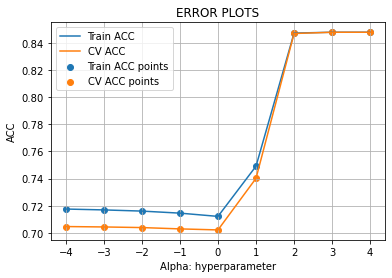

In [112]:
#applying the Bernoulli Naive Bayes on the prepared data set
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

train_acc  = []
cv_acc     = []
train_val  = []
cv_val     = []
log_i      = []
K = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1,10**2,10**3,10**4]

for i in tqdm(K):
    NB_Classifier = MultinomialNB(alpha = i)
    NB_Classifier.fit(X_tr_bow,y_train)
    y_train_pred     = NB_Classifier.predict(X_tr_bow)
    y_cv_pred        = NB_Classifier.predict(X_cr_bow)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    cv_acc.append(accuracy_score(y_cv, y_cv_pred))
for i in K:
    log_i.append(math.log10(i))
plt.plot(log_i, train_acc, label='Train ACC')
plt.plot(log_i, cv_acc, label='CV ACC')
plt.scatter(log_i, train_acc, label='Train ACC points')
plt.scatter(log_i, cv_acc, label='CV ACC points')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("ACC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

---End of Notebook---